<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/04_Transfer_Learning_P2_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FineTuning



In [1]:
###FineTuning

"""
in previous notebooks weve created a bunch of helper functions, now we can rewrite them
or we can use this

i have a file on github named helper_func.py there
all the function that ill need to use on here

"""

!wget https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py

--2023-10-31 23:36:38--  https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-31 23:36:38 (114 MB/s) - ‘helper_func.py’ saved [10246/10246]



In [2]:
from helper_func import *

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-10-31 23:36:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   255MB/s    in 0.6s    

2023-10-31 23:36:43 (255 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
unzip_data("/content/10_food_classes_10_percent.zip")
### btw this one is because of the helper_func.py

##Lets get some data

we are getting some pretrained models at
tf.keras.applications


In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

###before we are using from tensorflow.keras.preprocessing.image import ImageDataGenerator


now we are using tf.data.Dataset
which is faster but like imagedatagenerator is still the original and this is just new and improve version


In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [7]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

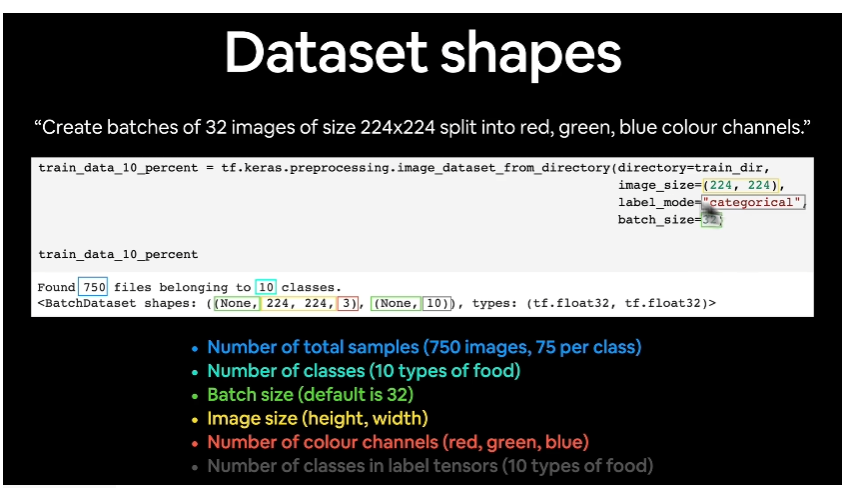

In [9]:
##  that is just a guide so that you know what are those

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [13]:
#see an example of a batch of data
#for images, labels in train_data_10_percent.take(1):
#  print(images, labels)

##FUNCTIONAL API VS SEQUENTIAL API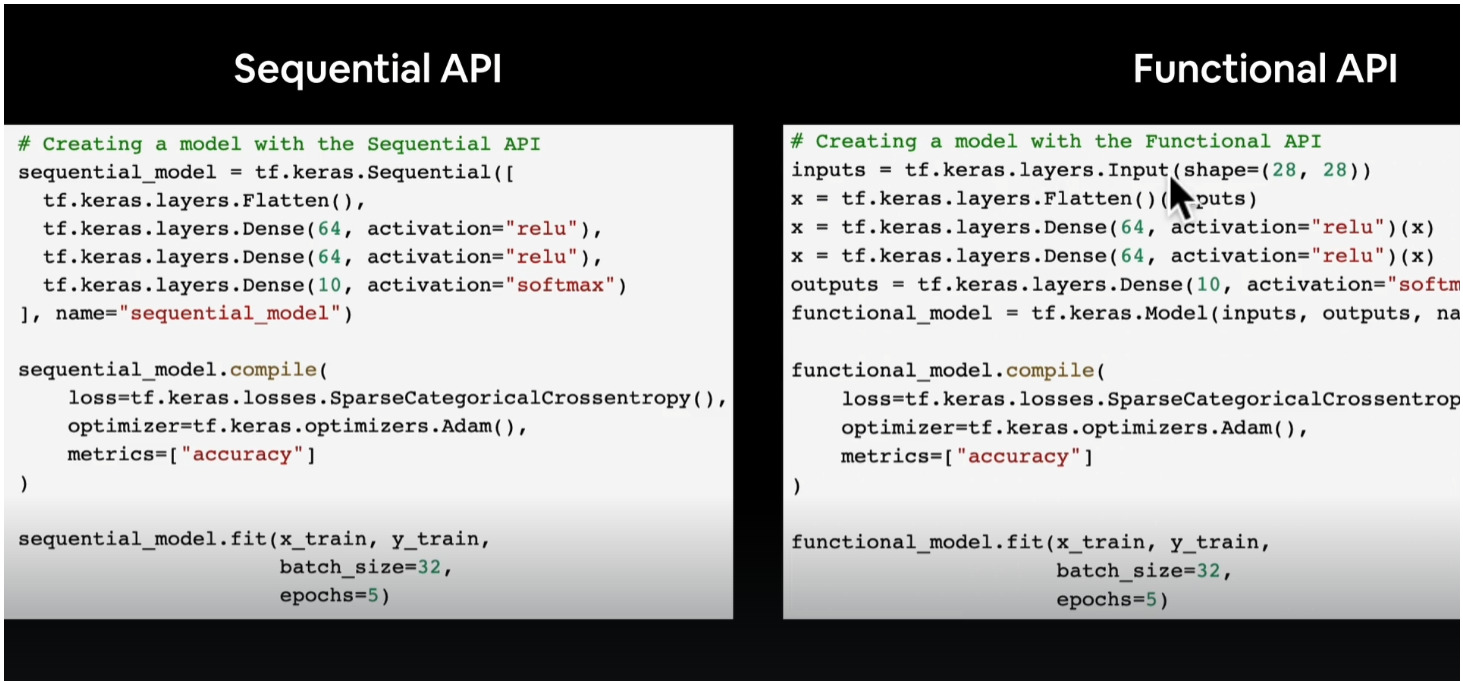

In [14]:
##########
######## new ; base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#########

###old : base_model = tf.keras.applications.EfficientNetB0(include_top=False)